In [139]:
import pandas as pd
import numpy as npy
from prophet import Prophet
import matplotlib.pyplot as plt
# %matplotlib inline
# import matplotlib.pyplot as plt

# Getting data

In [2]:
# https://www.kaggle.com/datasets/sazidthe1/data-science-salaries
ds_salaries_df = pd.read_csv("data_science_salaries.csv")
ds_salaries_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6599 entries, 0 to 6598
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   job_title           6599 non-null   object
 1   experience_level    6599 non-null   object
 2   employment_type     6599 non-null   object
 3   work_models         6599 non-null   object
 4   work_year           6599 non-null   int64 
 5   employee_residence  6599 non-null   object
 6   salary              6599 non-null   int64 
 7   salary_currency     6599 non-null   object
 8   salary_in_usd       6599 non-null   int64 
 9   company_location    6599 non-null   object
 10  company_size        6599 non-null   object
dtypes: int64(3), object(8)
memory usage: 567.2+ KB


# Adding 'ds' as a datetime stamp

In [35]:
ds_salaries_df["ds"] = pd.to_datetime(ds_salaries_df['work_year'].astype(str) + '-01-01')
ds_salaries_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6599 entries, 0 to 6598
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   job_title           6599 non-null   object        
 1   experience_level    6599 non-null   object        
 2   employment_type     6599 non-null   object        
 3   work_models         6599 non-null   object        
 4   work_year           6599 non-null   int64         
 5   employee_residence  6599 non-null   object        
 6   salary              6599 non-null   int64         
 7   salary_currency     6599 non-null   object        
 8   salary_in_usd       6599 non-null   int64         
 9   company_location    6599 non-null   object        
 10  company_size        6599 non-null   object        
 11  ds                  6599 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(3), object(8)
memory usage: 618.8+ KB


In [34]:
ds_salaries_df["employee_residence"].value_counts(normalize=True).head(40)




employee_residence
United States     0.803910
United Kingdom    0.060767
Canada            0.036521
Germany           0.010759
India             0.010608
Spain             0.010153
France            0.008032
Australia         0.004395
Portugal          0.004243
Netherlands       0.003182
Italy             0.003031
Brazil            0.002879
Colombia          0.002122
Greece            0.001970
Nigeria           0.001818
Poland            0.001667
Mexico            0.001515
Ireland           0.001515
Argentina         0.001364
Estonia           0.001212
Japan             0.001212
Philippines       0.001061
Ukraine           0.001061
Turkey            0.001061
Austria           0.000909
Slovenia          0.000909
Belgium           0.000909
Russia            0.000909
Pakistan          0.000909
Latvia            0.000909
Puerto Rico       0.000758
South Africa      0.000758
Vietnam           0.000758
Romania           0.000758
Switzerland       0.000758
Singapore         0.000758
Ghana    

# Isolating the df elements specific to my analysis  
## (hard break from origional)

In [36]:
ds_models_df = ds_salaries_df[['ds', 'salary_in_usd', 'work_models']]
ds_models_df

,ds,salary_in_usd,work_models
0,2024-01-01,148100,Remote
1,2024-01-01,98700,Remote
2,2024-01-01,140032,Remote
3,2024-01-01,100022,Remote
4,2024-01-01,120000,On-site
...,...,...,...
6594,2020-01-01,44753,Hybrid
6595,2020-01-01,15000,On-site
6596,2020-01-01,117104,Hybrid
6597,2020-01-01,74130,Hybrid


# Cleaning operaetion for Mean Salary  


<Axes: xlabel='ds'>

work_models,ds,Hybrid,On-site,Remote
0,2020-01-01,86879.142857,94258.111111,115214.083333
1,2021-01-01,81180.958333,106835.758621,109121.843478
2,2022-01-01,84869.150000,134873.779310,134176.040519
3,2023-01-01,81467.600000,155497.027260,145490.165359


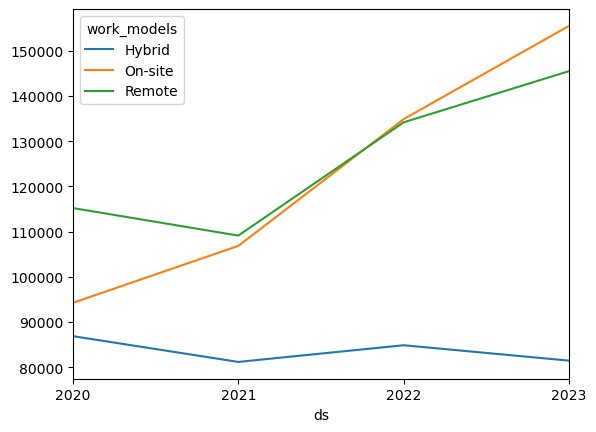

In [113]:
ds_models_money_df = ds_models_df.loc[ds_models_df['ds'] != "2024-01-01"]
ds_models_money_df = ds_models_money_df.groupby(['ds', 'work_models'])['salary_in_usd'].mean().unstack()
display(ds_models_money_df.plot())

ds_models_money_df = ds_models_money_df.reset_index()

display(ds_models_money_df)

# Cleaning operation for Number of Positions  
6599 rows.  
2024 data is partial.  As the year is nto done yet, the reasoning is obvious.  
The data was posted Jan 20th of 2024 (day 20).  
Covid Pandemic declaired by WHO pn March 11, 2020.  


<Axes: xlabel='ds'>

work_models,ds,Hybrid,On-site,Remote
0,2020-01-01,21,18,36
1,2021-01-01,72,29,115
2,2022-01-01,60,435,617
3,2023-01-01,70,2898,1657


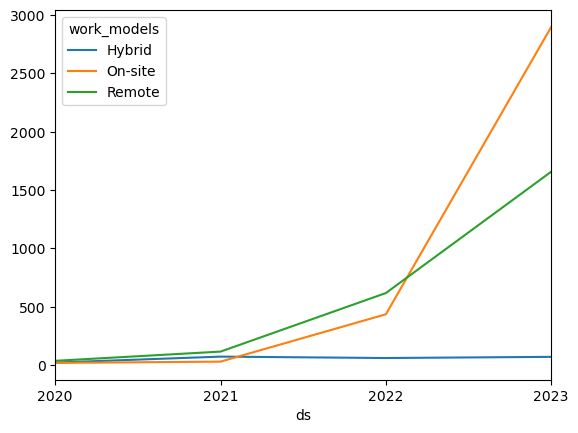

In [126]:

ds_models_number_df = ds_models_df.loc[ds_models_df['ds'] != "2024-01-01"]
ds_models_number_df = pd.pivot_table(ds_models_number_df,index='ds', values='salary_in_usd', columns='work_models', aggfunc='count')
# ds_models_number_df = ds_models_number_df.groupby(['ds', 'work_models']).count().unstack()

display(ds_models_number_df.plot())

ds_models_number_df = ds_models_number_df.reset_index()

display(ds_models_number_df)


# Cleaning operation for Total Budget  

<Axes: xlabel='ds'>

work_models,ds,Hybrid,On-site,Remote
0,2020-01-01,1824462,1696646,4147707
1,2021-01-01,5845029,3098237,12549012
2,2022-01-01,5092149,58670094,82786617
3,2023-01-01,5702732,450630385,241077204


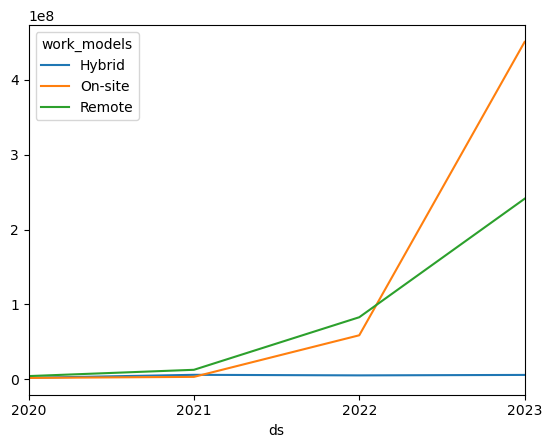

In [124]:
ds_models_budget_df = ds_models_df.loc[ds_models_df['ds'] != "2024-01-01"]

ds_models_budget_df = pd.pivot_table(ds_models_budget_df,index='ds', values='salary_in_usd', columns='work_models', aggfunc='sum')
#  Old version --> ds_models_number_df = ds_models_budget_df.groupby(['ds', 'work_models']).sum()#.unstack()

# ds_models_budget_df
display(ds_models_budget_df.plot())

ds_models_budget_df = ds_models_budget_df.reset_index()

display(ds_models_budget_df)

In [ ]:
### ----------------- Planning --------------------------
# Visual 1 - Prediction of mean salery in 2025
# Visual 2 - Prediction of mean # of positions in 2025
# Visual 3 - Prediction of total Budget

# ds_models_money_df
# ds_models_number_df
# ds_models_budget_df

# Prophet run

In [206]:
# Prophet Planning - M08D03A02

# ------ Reset index so date is a colume that can be accessed by name
# df = df.reset_index()


# -------- ds and y
# df = df.rename(columns={
#     "Date":"ds",
#     "Value":"y",
# })
# df = df.dropna()


# ----- Call Prophet function
#     ↓↓↓↓↓↓↓↓↓
# m = Prophet()


# ----- Fit the model --> This is what puts the Model Object around the present values (including the present time series) in the origional df.
#   ↓↓↓
# m.fit(df)


# ----- Make space to hold predictions
#                ↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓
# future_df = m.make_future_datafame(periods=2000, freq="h")



# ------ Make Forcast
# forcast_df = m.predict(future_df)


# ==========================
# m = Prophet()
# m.fit(df)
# future_df = m.make_future_datafame(periods=2000, freq="h")
# forcast_df = m.predict(future_df)

In [128]:
### ---------------------- Splitting up old toys ----------------------------
### S/H/R → 
ds_models_money_df
df_money_s = ds_models_money_df[["ds", "On-site"]].rename(columns={"On-site":"y"})
df_money_h = ds_models_money_df[["ds", "Hybrid"]].rename(columns={"Hybrid":"y"})
df_money_r = ds_models_money_df[["ds", "Remote"]].rename(columns={"Remote":"y"})

ds_models_number_df
df_number_s = ds_models_number_df[["ds", "On-site"]].rename(columns={"On-site":"y"})
df_number_h = ds_models_number_df[["ds", "Hybrid"]].rename(columns={"Hybrid":"y"})
df_number_r = ds_models_number_df[["ds", "Remote"]].rename(columns={"Remote":"y"})

ds_models_budget_df
df_budget_s = ds_models_budget_df[["ds", "On-site"]].rename(columns={"On-site":"y"})
df_budget_h = ds_models_budget_df[["ds", "Hybrid"]].rename(columns={"Hybrid":"y"})
df_budget_r = ds_models_budget_df[["ds", "Remote"]].rename(columns={"Remote":"y"})

In [135]:
### ---------------------- Making new toys ----------------------------
m_money_s = Prophet()
m_money_h = Prophet()
m_money_r = Prophet()
m_number_s = Prophet()
m_number_h = Prophet()
m_number_r = Prophet()
m_budget_s = Prophet()
m_budget_h = Prophet()
m_budget_r = Prophet()

In [137]:
### ---------------------- Putting new toys on old toys ----------------------------
m_money_s.fit(df_money_s)
m_money_h.fit(df_money_h)
m_money_r.fit(df_money_r)
m_number_s.fit(df_number_s)
m_number_h.fit(df_number_h)
m_number_r.fit(df_number_r)
m_budget_s.fit(df_budget_s)
m_budget_h.fit(df_budget_h)
m_budget_r.fit(df_budget_r)


19:36:01 - cmdstanpy - INFO - Chain [1] start processing
19:36:02 - cmdstanpy - INFO - Chain [1] done processing
19:36:02 - cmdstanpy - INFO - Chain [1] start processing
19:36:02 - cmdstanpy - INFO - Chain [1] done processing
19:36:02 - cmdstanpy - INFO - Chain [1] start processing
19:36:02 - cmdstanpy - INFO - Chain [1] done processing
19:36:02 - cmdstanpy - INFO - Chain [1] start processing
19:36:02 - cmdstanpy - INFO - Chain [1] done processing
19:36:02 - cmdstanpy - INFO - Chain [1] start processing
19:36:02 - cmdstanpy - INFO - Chain [1] done processing
19:36:02 - cmdstanpy - INFO - Chain [1] start processing
19:36:02 - cmdstanpy - INFO - Chain [1] done processing
19:36:02 - cmdstanpy - INFO - Chain [1] start processing
19:36:02 - cmdstanpy - INFO - Chain [1] done processing
19:36:02 - cmdstanpy - INFO - Chain [1] start processing
19:36:02 - cmdstanpy - INFO - Chain [1] done processing
19:36:02 - cmdstanpy - INFO - Chain [1] start processing
19:36:02 - cmdstanpy - INFO - Chain [1]

In [141]:
### ---------------------- Making boxes for future toys ----------------------------

future_money_s_df = m_money_s.make_future_dataframe(periods=2, freq="YE")
future_money_h_df = m_money_h.make_future_dataframe(periods=2, freq="YE")
future_money_r_df = m_money_r.make_future_dataframe(periods=2, freq="YE")
future_number_s_df = m_number_s.make_future_dataframe(periods=2, freq="YE")
future_number_h_df = m_number_h.make_future_dataframe(periods=2, freq="YE")
future_number_r_df = m_number_r.make_future_dataframe(periods=2, freq="YE")
future_budget_s_df = m_budget_s.make_future_dataframe(periods=2, freq="YE")
future_budget_h_df = m_budget_h.make_future_dataframe(periods=2, freq="YE")
future_budget_r_df = m_budget_r.make_future_dataframe(periods=2, freq="YE")

In [162]:
### ---------------------- Filling boxes w future toys ----------------------------
forcast_money_s_df = m_money_s.predict(future_money_s_df)
forcast_money_h_df = m_money_h.predict(future_money_h_df)
forcast_money_r_df = m_money_r.predict(future_money_r_df)
forcast_number_s_df = m_number_s.predict(future_number_s_df)
forcast_number_h_df = m_number_h.predict(future_number_h_df)
forcast_number_r_df = m_number_r.predict(future_number_r_df)
forcast_budget_s_df = m_budget_s.predict(future_budget_s_df)
forcast_budget_h_df = m_budget_h.predict(future_budget_h_df)
forcast_budget_r_df = m_budget_r.predict(future_budget_r_df)

In [179]:
### --------------------- Putting the pieces back together -----------------------------------

forcast_money_df = forcast_money_h_df[['ds', 'yhat']].copy().rename(columns={'yhat':'Hybrid'})
forcast_money_df['On-site'] = forcast_money_s_df['yhat']
forcast_money_df['Remote'] = forcast_money_r_df['yhat']

forcast_number_df = forcast_number_h_df[['ds', 'yhat']].copy().rename(columns={'yhat':'Hybrid'})
forcast_number_df['On-site'] = forcast_number_s_df['yhat']
forcast_number_df['Remote'] = forcast_number_r_df['yhat']

forcast_budget_df = forcast_budget_h_df[['ds', 'yhat']].copy().rename(columns={'yhat':'Hybrid'})
forcast_budget_df['On-site'] = forcast_budget_s_df['yhat']
forcast_budget_df['Remote'] = forcast_budget_r_df['yhat']

forcast_number_df

,ds,Hybrid,On-site,Remote
0,2020-01-01,21.026853,16.687146,34.007755
1,2021-01-01,68.358082,-307.412193,25.876740
2,2022-01-01,67.218485,1118.681679,795.025479
3,2023-01-01,66.395450,2551.660221,1572.541198
4,2023-12-31,22.640198,5826.358939,3252.504500
5,2024-12-31,65.756674,5436.111908,3151.692692


'ds_models_money_df'

work_models,ds,Hybrid,On-site,Remote
0,2020-01-01,86879.142857,94258.111111,115214.083333
1,2021-01-01,81180.958333,106835.758621,109121.843478
2,2022-01-01,84869.150000,134873.779310,134176.040519
3,2023-01-01,81467.600000,155497.027260,145490.165359


'forcast_money_df'

,ds,Hybrid,On-site,Remote
0,2020-01-01,86881.482244,94255.114536,115215.773645
1,2021-01-01,81183.318228,106832.730479,110908.166543
2,2022-01-01,84871.504547,134870.788395,130611.703916
3,2023-01-01,81469.952610,155494.091742,147271.958719
4,2023-12-31,67916.584078,155898.527246,139604.065256
5,2024-12-31,70993.442215,190074.180314,171513.024378


'display_money_df'

,Hybrid,On-site,Remote
ds,,,
2020-01-01,86879.142857,94258.111111,115214.083333
2021-01-01,81180.958333,106835.758621,109121.843478
2022-01-01,84869.150000,134873.779310,134176.040519
2023-01-01,81467.600000,155497.027260,145490.165359
2023-12-31,67916.584078,155898.527246,139604.065256
2024-12-31,70993.442215,190074.180314,171513.024378


<Axes: xlabel='ds'>

'-----------------------------------------------------------------------------------------------'

'ds_models_number_df'

work_models,ds,Hybrid,On-site,Remote
0,2020-01-01,21,18,36
1,2021-01-01,72,29,115
2,2022-01-01,60,435,617
3,2023-01-01,70,2898,1657


'forcast_number_df'

,ds,Hybrid,On-site,Remote
0,2020-01-01,21.026853,16.687146,34.007755
1,2021-01-01,68.358082,-307.412193,25.876740
2,2022-01-01,67.218485,1118.681679,795.025479
3,2023-01-01,66.395450,2551.660221,1572.541198
4,2023-12-31,22.640198,5826.358939,3252.504500
5,2024-12-31,65.756674,5436.111908,3151.692692


'display_number_df'

,Hybrid,On-site,Remote
ds,,,
2020-01-01,21.000000,18.000000,36.000000
2021-01-01,72.000000,29.000000,115.000000
2022-01-01,60.000000,435.000000,617.000000
2023-01-01,70.000000,2898.000000,1657.000000
2023-12-31,22.640198,5826.358939,3252.504500
2024-12-31,65.756674,5436.111908,3151.692692


<Axes: xlabel='ds'>

'-----------------------------------------------------------------------------------------------'

'ds_models_budget_df'

work_models,ds,Hybrid,On-site,Remote
0,2020-01-01,1824462,1696646,4147707
1,2021-01-01,5845029,3098237,12549012
2,2022-01-01,5092149,58670094,82786617
3,2023-01-01,5702732,450630385,241077204


'forcast_budget_df'

,ds,Hybrid,On-site,Remote
0,2020-01-01,1.825106e+06,1.447637e+06,4.128162e+06
1,2021-01-01,5.622881e+06,-5.188408e+07,-1.854219e+06
2,2022-01-01,5.534405e+06,1.705282e+08,1.117917e+08
3,2023-01-01,5.481606e+06,3.939645e+08,2.264787e+08
4,2023-12-31,2.150521e+06,9.065980e+08,4.761331e+08
5,2024-12-31,5.487613e+06,8.435688e+08,4.588263e+08


'display_budget_df'

,Hybrid,On-site,Remote
ds,,,
2020-01-01,1.824462e+06,1.696646e+06,4.147707e+06
2021-01-01,5.845029e+06,3.098237e+06,1.254901e+07
2022-01-01,5.092149e+06,5.867009e+07,8.278662e+07
2023-01-01,5.702732e+06,4.506304e+08,2.410772e+08
2023-12-31,2.150521e+06,9.065980e+08,4.761331e+08
2024-12-31,5.487613e+06,8.435688e+08,4.588263e+08


<Axes: xlabel='ds'>

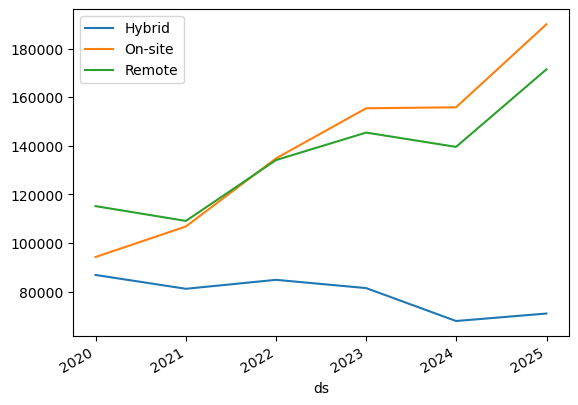

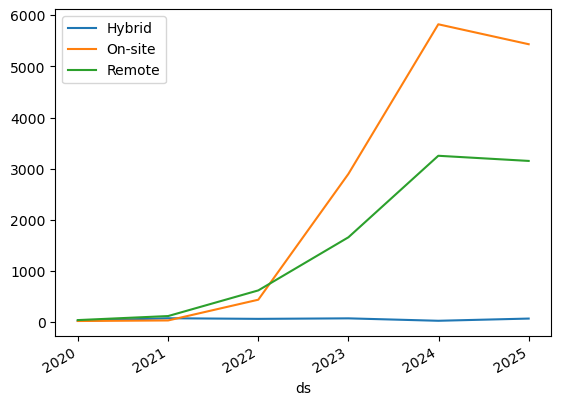

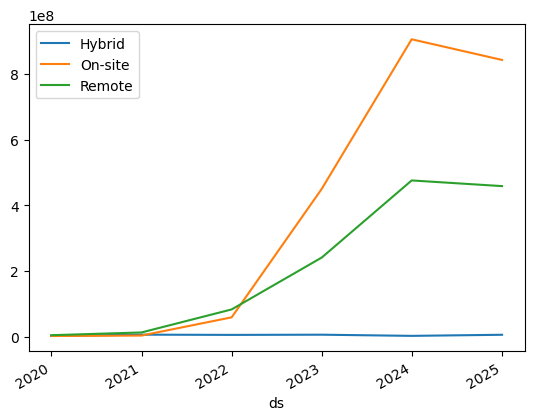

In [205]:
# ---------------------- Generating dispay dfs -------------------------------------------------
display_money_df = pd.concat([ds_models_money_df, forcast_money_df.loc[forcast_money_df["ds"] > '2023']], ignore_index=True).set_index("ds")
display_number_df = pd.concat([ds_models_number_df, forcast_number_df.loc[forcast_number_df["ds"] > '2023']], ignore_index=True).set_index("ds")
display_budget_df = pd.concat([ds_models_budget_df, forcast_budget_df.loc[forcast_budget_df["ds"] > '2023']], ignore_index=True).set_index("ds")


ds_models_number_df

display("ds_models_money_df")
display(ds_models_money_df)
display("forcast_money_df")
display(forcast_money_df)
display("display_money_df")
display(display_money_df)
display(display_money_df.plot())

display("-----------------------------------------------------------------------------------------------")

display("ds_models_number_df")
display(ds_models_number_df)
display("forcast_number_df")
display(forcast_number_df)
display("display_number_df")
display(display_number_df)
display(display_number_df.plot())

display("-----------------------------------------------------------------------------------------------")

display("ds_models_budget_df")
display(ds_models_budget_df)
display("forcast_budget_df")
display(forcast_budget_df)
display("display_budget_df")
display(display_budget_df)
display(display_budget_df.plot())


# Graphs

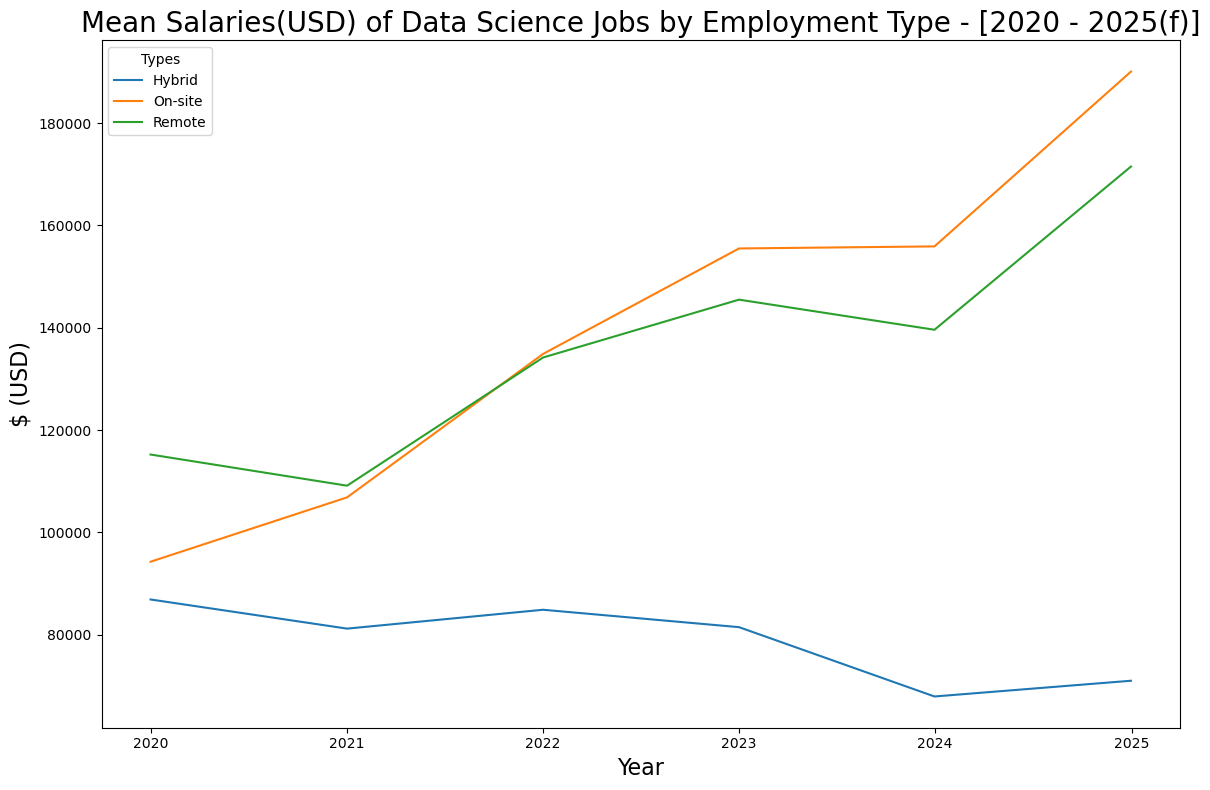

In [215]:
### ----------------  Money plot ------------------
# import matplotlib.pyplot as plt

### display_money_df
### display_number_df
### display_budget_df

plt.figure(figsize=(12, 8))
plt.plot(display_money_df)
plt.title('Mean Salaries(USD) of Data Science Jobs by Employment Type - [2020 - 2025(f)]', fontsize=20)
plt.xlabel('Year', fontsize=16)
plt.ylabel('$ (USD)', fontsize=16)
# plt.xticks(rotation=45)
legend_names = display_money_df.columns
plt.legend(title='Types', loc="upper left", labels=legend_names)
plt.tight_layout()
plt.show()

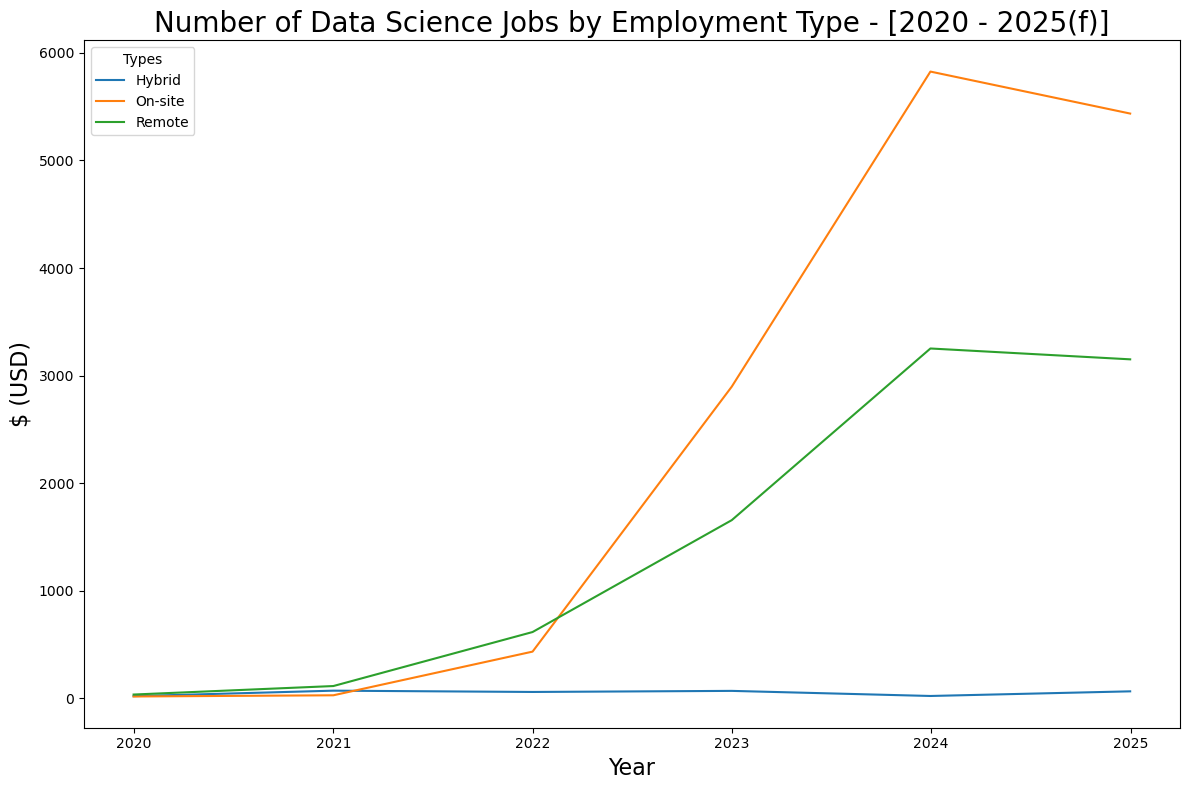

In [216]:
### ----------------  Number plot ------------------
# import matplotlib.pyplot as plt

### display_money_df
### display_number_df
### display_budget_df

plt.figure(figsize=(12, 8))
plt.plot(display_number_df)
plt.title('Number of Data Science Jobs by Employment Type - [2020 - 2025(f)]', fontsize=20)
plt.xlabel('Year', fontsize=16)
plt.ylabel('$ (USD)', fontsize=16)
# plt.xticks(rotation=45)
legend_names = display_money_df.columns
plt.legend(title='Types', loc="upper left", labels=legend_names)
plt.tight_layout()
plt.show()

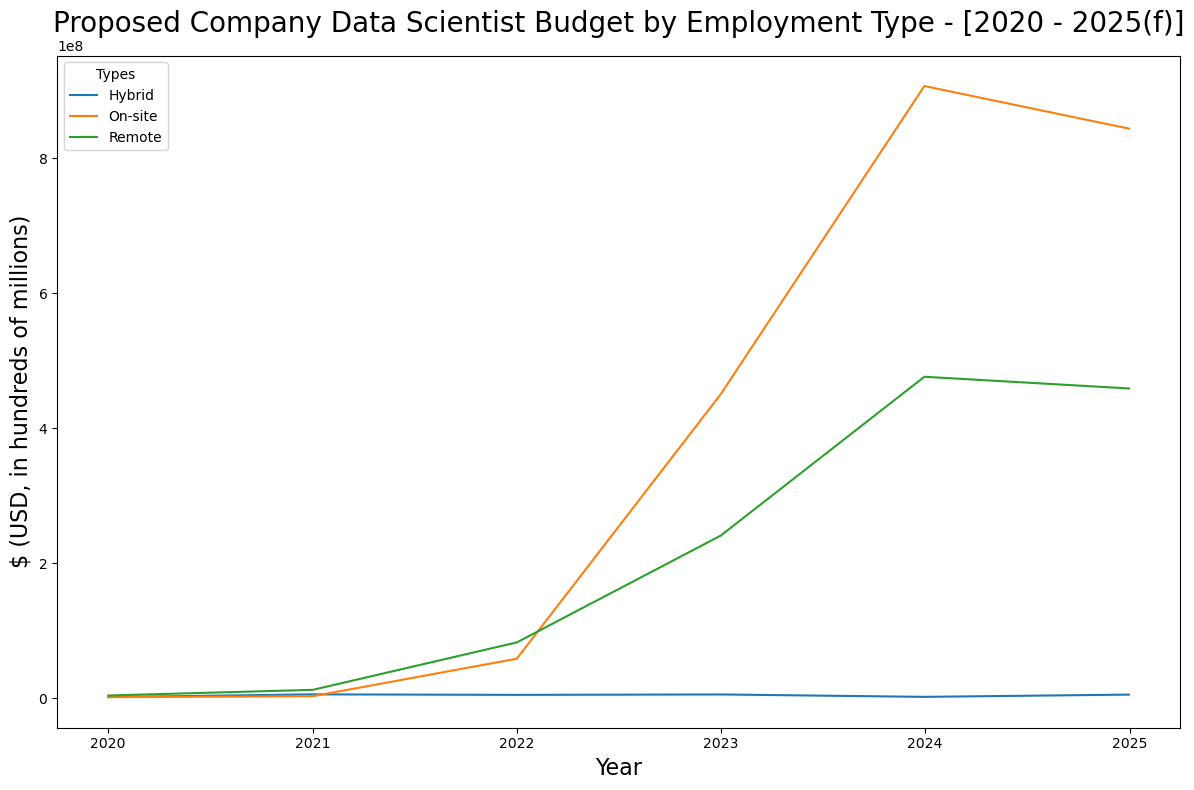

In [218]:
### ----------------  Budget plot ------------------
# import matplotlib.pyplot as plt

### display_money_df
### display_number_df
### display_budget_df

plt.figure(figsize=(12, 8))
plt.plot(display_budget_df)
plt.title('Proposed Company Data Scientist Budget by Employment Type - [2020 - 2025(f)]', fontsize=20)
plt.xlabel('Year', fontsize=16)
plt.ylabel('$ (USD, in hundreds of millions)', fontsize=16)
# plt.xticks(rotation=45)
legend_names = display_money_df.columns
plt.legend(title='Types', loc="upper left", labels=legend_names)
plt.tight_layout()
plt.show()

In [ ]:
# df.groupby("type")['number'].sum().sort_values(ascending=False).plot(kind="pie")
# plt.pie(df["number"] lables=df['type'])

## matplotlib
## plt.show()